This notebook will be used to test the sensitivity of tidal ellipses from the model output based on data series variations such as length, frequency and seasonality.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
from glob import glob
import pandas as pd
from matplotlib.patches import Ellipse

from salishsea_tools import(viz_tools, tidetools, nc_tools)
from salishsea_tools.nowcast import (analyze, figures, research_VENUS)
from IPython.display import Image
import datetime

%matplotlib inline

##1. Frequency
The model has been giving an ouput for tracers and velocities every 15 minutes since Myy 9th 2015. This section will compare the tidal ellipses of the hourly data and the quarter-hourly data between the 9th and 31st of May 2015.

The tidal ellipse paramaters have been calculated and entered into a CSV in the [SaveTidalParameter](www.nbviewer.ipython.org/urls/bitbucket.org/salishsea/analysis/raw/tip/Muriel/SaveTidalParameters.ipynb) notebook

In [4]:
to=datetime.datetime(2015,5,9)
to2=datetime.datetime(2014,11,26)
tf=datetime.datetime(2015,5,30)
tf2 = datetime.datetime(2015, 6, 8)

t_o = to.strftime('%d%b%y').lower()
t_o2 = to2.strftime('%d%b%y').lower()
t_f = tf.strftime('%d%b%y').lower()
t_f2 = tf2.strftime('%d%b%y').lower()

runname1 = '{}_{}_{}_Central'.format(t_o, t_f, '15')
runname2 = '{}_{}_{}_Central'.format(t_o, t_f, 'h')
runname3 = '{}_{}_{}_Central'.format(t_o2, t_f2, 'h')
cols=np.arange(0,7)

df1 = pd.read_csv(runname1+'.csv', usecols=cols) 
df2 = pd.read_csv(runname2+'.csv', usecols=cols)
df3 = pd.read_csv(runname3+'.csv', usecols=cols)

qh_c = df1.as_matrix()
h_c = df2.as_matrix()
hlong_c = df3.as_matrix()

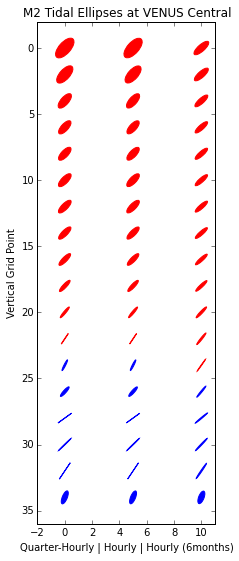

In [5]:
fig = plt.figure(figsize=(7,9))
ax = fig.add_subplot(121)
scale = 7
interval = 2

for dep in np.arange(0,37,interval):
    if qh_c[dep,2] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(0,dep), width=scale*qh_c[dep,1], 
                        height=scale*qh_c[dep,2], angle=qh_c[dep,3],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)
    
for dep in np.arange(0,40,interval):
    if h_c[dep,2] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(5,dep), width=scale*h_c[dep,1], 
                        height=scale*h_c[dep,2], angle=h_c[dep,3],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)
    
for dep in np.arange(0,40,interval):
    if hlong_c[dep,2] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(10,dep), width=scale*hlong_c[dep,1], 
                        height=scale*hlong_c[dep,2], angle=hlong_c[dep,3],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)
ax.set_ylim(-2,36)
ax.invert_yaxis()
ax.set_xlim(-2,11)
ax.set_title('M2 Tidal Ellipses at VENUS Central')
ax.set_ylabel('Vertical Grid Point')
ax.set_xlabel('Quarter-Hourly | Hourly | Hourly (6months)')

In [6]:
print "Central                15 Min                           Hourly                        Hourly (6 months)"
print "Depth    Major-Axis  Minor-Axis  Angle |  Major-Axis  Minor-Axis  Angle   |  Major-Axis  Minor-Axis  Angle "
print " (m)        (m/s)      (m/s)     (deg.    (m/s)       (m/s)      (deg.        (m/s)       (m/s)      (deg."
print "                                 ccw E)                          ccw E)                               ccw E)"
for i in np.arange(0,39,interval):
    if qh_c[i,1] > 0 :  
        print '{0:5.1f}      {1:.2f}        {2:.2f}       {3:.0f}      {4:.2f}       {5:.2f}       {6:.0f}      {7:.2f}       {8:.2f}       {9:.0f}'.format(qh_c[i,0], 
            qh_c[i,1], qh_c[i,2], qh_c[i,3], h_c[i,1], h_c[i,2],  h_c[i,3], hlong_c[i,1], hlong_c[i,2],  hlong_c[i,3])


Central                15 Min                           Hourly                        Hourly (6 months)
Depth    Major-Axis  Minor-Axis  Angle |  Major-Axis  Minor-Axis  Angle   |  Major-Axis  Minor-Axis  Angle 
 (m)        (m/s)      (m/s)     (deg.    (m/s)       (m/s)      (deg.        (m/s)       (m/s)      (deg.
                                 ccw E)                          ccw E)                               ccw E)
  0.5      0.26        -0.12       130      0.26       -0.12       130      0.20       -0.07       137
  2.5      0.23        -0.11       131      0.23       -0.10       131      0.19       -0.07       137
  4.5      0.19        -0.08       130      0.19       -0.08       130      0.18       -0.06       137
  6.5      0.18        -0.07       131      0.18       -0.07       131      0.17       -0.05       137
  8.5      0.18        -0.07       132      0.18       -0.07       132      0.17       -0.05       137
 10.5      0.18        -0.07       133      0.18       -0

The length makes much more of a difference than the frequency. Wether or not the high frequency over a longer time period is a better representation of the model currents, we do not know yet.

#Seasonal Sensitivity
The currents and tides vary between seasons...
We will compare winter tidal ellipses to spring ones, while avoiding the freshet, late may to mid june. We avoid the freshet because the freshwater output from Fraser River is very high during that time and this changes particularly the surface currents.

Winter: November 26th 2014 to  February 26th 2015

Spring: February 27th to May 27th 2015


In [23]:
to=datetime.datetime(2014,11,26)
to2=datetime.datetime(2015,2,27)
tf=datetime.datetime(2015,2,26)
tf2 = datetime.datetime(2015,5,27)

t_o = to.strftime('%d%b%y').lower()
t_o2 = to2.strftime('%d%b%y').lower()
t_f = tf.strftime('%d%b%y').lower()
t_f2 = tf2.strftime('%d%b%y').lower()

runcw = '{}_{}_Central_winter'.format(t_o, t_f)
runcs = '{}_{}_Central_spring'.format(t_o2, t_f2)
runew = '{}_{}_East_winter'.format(t_o, t_f)
runes = '{}_{}_East_spring'.format(t_o2, t_f2)

cols=np.arange(0,7)

dfcw = pd.read_csv(runcw+'.csv', usecols=cols) 
dfcs = pd.read_csv(runcs+'.csv', usecols=cols)
dfew = pd.read_csv(runew+'.csv', usecols=cols) 
dfes = pd.read_csv(runes+'.csv', usecols=cols)

cw = dfcw.as_matrix() 
cs = dfcs.as_matrix()
ew = dfew.as_matrix()
es = dfes.as_matrix()

In [24]:
print cw.shape

(39, 7)


##Central
###Visual comparison 

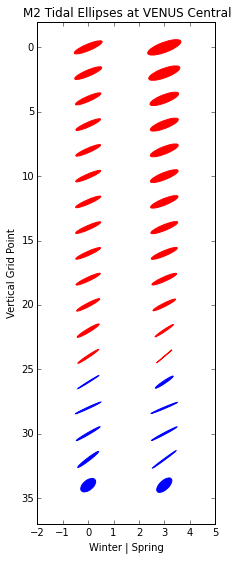

In [25]:
fig = plt.figure(figsize=(7,9))
ax = fig.add_subplot(121)
scale = 8
interval = 2

for dep in np.arange(0,39,interval):
    if cw[dep,2] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(0,dep), width=scale*cw[dep,1], 
                        height=scale*cw[dep,2], angle=cw[dep,3],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)
    
for dep in np.arange(0,37,interval):
    if cs[dep,2] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(3,dep), width=scale*cs[dep,1], 
                        height=scale*cs[dep,2], angle=cs[dep,3],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)

ax.set_ylim(-2,37)
ax.invert_yaxis()
ax.set_xlim(-2,5)
ax.set_title('M2 Tidal Ellipses at VENUS Central')
ax.set_ylabel('Vertical Grid Point')
ax.set_xlabel('Winter | Spring')

###Comparing with a table

In [26]:
print "Central             Winter                            Spring       "
print "Depth    Major-Axis  Minor-Axis  Angle |  Major-Axis  Minor-Axis  Angle  "
print " (m)        (m/s)      (m/s)     (deg.    (m/s)       (m/s)      (deg.  "
print "                                 ccw E)                          ccw E)"
for i in np.arange(0,39,interval):
    if cw[i,1] > 0 :  
        print '{0:5.1f}      {1:.2f}        {2:.2f}       {3:.0f}      {4:.2f}       {5:.2f}       {6:.0f}'.format(cw[i,0], 
            cw[i,1], cw[i,2], cw[i,3], cs[i,1], cs[i,2],  cs[i,3])


Central             Winter                            Spring       
Depth    Major-Axis  Minor-Axis  Angle |  Major-Axis  Minor-Axis  Angle  
 (m)        (m/s)      (m/s)     (deg.    (m/s)       (m/s)      (deg.  
                                 ccw E)                          ccw E)
  0.5      0.18        -0.05       138      0.21       -0.08       139
  2.5      0.17        -0.05       138      0.19       -0.08       139
  4.5      0.17        -0.04       137      0.18       -0.07       138
  6.5      0.16        -0.04       137      0.18       -0.06       138
  8.5      0.16        -0.03       138      0.18       -0.06       138
 10.5      0.16        -0.03       138      0.18       -0.06       138
 12.5      0.16        -0.03       138      0.17       -0.05       139
 14.6      0.16        -0.03       138      0.17       -0.05       139
 16.8      0.16        -0.03       137      0.17       -0.04       138
 19.5      0.16        -0.03       136      0.16       -0.03       137
 24

The spring ellipses are larger in the spring and there is more difference at the surface, as expected. We may be able to conclude that the deep currents do not vary much in the deep at the Central node, they are not affected by seasonal changes

##East 
Let's see if the East node's seasonal comparison follows the same trends. I suspect it will just be amplified because it is closer to the Fraser River and shallower

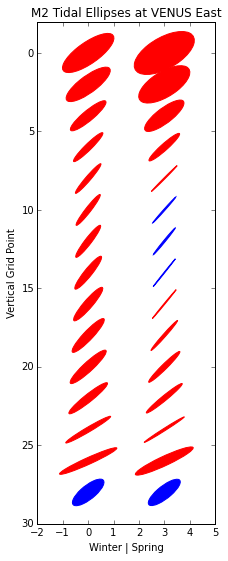

In [27]:
fig = plt.figure(figsize=(7,9))
ax = fig.add_subplot(121)
scale = 8
interval = 2

for dep in np.arange(0,39,interval):
    if ew[dep,2] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(0,dep), width=scale*ew[dep,1], 
                        height=scale*ew[dep,2], angle=ew[dep,3],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)
    
for dep in np.arange(0,37,interval):
    if es[dep,2] > 0:
        thec = 'b'
    else:
        thec = 'r'
    ells = Ellipse(xy=(3,dep), width=scale*es[dep,1], 
                        height=scale*es[dep,2], angle=es[dep,3],
                        color=thec)
    ax.add_artist(ells)
    ells.set_facecolor(thec)

ax.set_ylim(-2,30)
ax.invert_yaxis()
ax.set_xlim(-2,5)
ax.set_title('M2 Tidal Ellipses at VENUS East')
ax.set_ylabel('Vertical Grid Point')
ax.set_xlabel('Winter | Spring')

In [28]:
print "East                Winter                            Spring       "
print "Depth    Major-Axis  Minor-Axis  Angle |  Major-Axis  Minor-Axis  Angle  "
print " (m)        (m/s)      (m/s)     (deg.    (m/s)       (m/s)      (deg.  "
print "                                 ccw E)                          ccw E)"
for i in np.arange(0,39,interval):
    if ew[i,1] > 0 :  
        print '{0:5.1f}      {1:.2f}        {2:.2f}       {3:.0f}      {4:.2f}       {5:.2f}       {6:.0f}'.format(ew[i,0], 
            ew[i,1], ew[i,2], ew[i,3], es[i,1], es[i,2],  es[i,3])


East                Winter                            Spring       
Depth    Major-Axis  Minor-Axis  Angle |  Major-Axis  Minor-Axis  Angle  
 (m)        (m/s)      (m/s)     (deg.    (m/s)       (m/s)      (deg.  
                                 ccw E)                          ccw E)
  0.5      0.38        -0.14       127      0.40       -0.20       128
  2.5      0.33        -0.11       127      0.35       -0.16       128
  4.5      0.29        -0.06       125      0.30       -0.09       126
  6.5      0.27        -0.04       122      0.26       -0.04       124
  8.5      0.27        -0.03       118      0.24       -0.01       122
 10.5      0.27        -0.03       115      0.24       0.01       119
 12.5      0.28        -0.04       115      0.24       0.01       117
 14.6      0.29        -0.04       116      0.25       0.00       116
 16.8      0.30        -0.05       117      0.26       -0.01       117
 19.5      0.31        -0.05       119      0.27       -0.02       119
 24.1 

Again we observe the deep water currents are basically the same. However at the East node the changes start sooner and are larger, this is because it is not as deep as the Central ndoe and the currents are generally stronger here. The angle is very slightly different, almost the same. The surface currents are larger in the spring. Around 10m during the spring the ellipse is almost rectiliniar... The current is smaller is the spring at mid depths...